In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
   
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | comodoro rivadavia
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | maceio
Processing Record 6 of Set 1 | lodja
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | sataua
City not found. Skipping...
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | teya
Processing Record 17 of Set 1 | inuvik
Processing Record 18 of Set 1 | burnie
Processing Record 19 of Set 1 | sobolevo
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | talaya
Proce

Processing Record 37 of Set 4 | papara
Processing Record 38 of Set 4 | berezovka
Processing Record 39 of Set 4 | antalaha
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | kabo
Processing Record 42 of Set 4 | onega
Processing Record 43 of Set 4 | kuche
City not found. Skipping...
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | deputatskiy
Processing Record 46 of Set 4 | ternate
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | puerto escondido
Processing Record 49 of Set 4 | ambon
Processing Record 50 of Set 4 | yumen
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | sorong
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | bilma
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | puerto leguizamo
Processing Record 8 of Set 5 | praia
Processing Record 9 of Set 5 | wuzhou
Processing Record 10 of Set 5 | nhulunbuy
Process

Processing Record 28 of Set 8 | ihosy
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | sisimiut
Processing Record 31 of Set 8 | xuddur
Processing Record 32 of Set 8 | tocopilla
Processing Record 33 of Set 8 | pitimbu
Processing Record 34 of Set 8 | kerema
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | luanda
Processing Record 37 of Set 8 | ormara
Processing Record 38 of Set 8 | nizhnyaya maktama
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | solnechnyy
Processing Record 41 of Set 8 | mayo
Processing Record 42 of Set 8 | staryy nadym
Processing Record 43 of Set 8 | adrar
Processing Record 44 of Set 8 | padang
Processing Record 45 of Set 8 | bairiki
Processing Record 46 of Set 8 | aksay
Processing Record 47 of Set 8 | flinders
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | namatanai
Processing Record 50 of Set 8 | springbok
Processing Record 1 of Set 9 | sabzevar
Processing Record 

Processing Record 20 of Set 12 | abai
Processing Record 21 of Set 12 | yeppoon
Processing Record 22 of Set 12 | adre
Processing Record 23 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 24 of Set 12 | tubruq
City not found. Skipping...
Processing Record 25 of Set 12 | vung tau
Processing Record 26 of Set 12 | black river
Processing Record 27 of Set 12 | bourail
Processing Record 28 of Set 12 | bolshaya atnya
City not found. Skipping...
Processing Record 29 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 12 | ca mau
Processing Record 31 of Set 12 | atlantic city
Processing Record 32 of Set 12 | rypefjord
Processing Record 33 of Set 12 | waddan
Processing Record 34 of Set 12 | the pas
Processing Record 35 of Set 12 | bartlesville
Processing Record 36 of Set 12 | zhangzhou
Processing Record 37 of Set 12 | panaba
Processing Record 38 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 12 | peniche
Processin

In [13]:
count = len(city_data)
print(count)

546


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,82.36,72,46,8.86,EC,2022-01-29 17:06:26
1,Comodoro Rivadavia,-45.8667,-67.5000,84.06,9,0,20.71,AR,2022-01-29 17:06:26
2,Caravelas,-17.7125,-39.2481,86.99,59,19,10.51,BR,2022-01-29 17:06:27
3,Bluff,-46.6000,168.3333,57.96,84,100,6.38,NZ,2022-01-29 17:06:27
4,Maceio,-9.6658,-35.7353,87.24,62,100,8.05,BR,2022-01-29 17:02:48
5,Lodja,-3.4833,23.4333,75.92,70,83,1.90,CD,2022-01-29 17:06:27
6,Arraial Do Cabo,-22.9661,-42.0278,84.06,70,75,5.75,BR,2022-01-29 17:06:28
7,Tasiilaq,65.6145,-37.6368,17.76,75,86,6.24,GL,2022-01-29 17:02:15
8,Rikitea,-23.1203,-134.9692,77.27,75,82,12.50,PF,2022-01-29 17:04:40
9,Mataura,-46.1927,168.8643,56.23,82,100,2.15,NZ,2022-01-29 17:06:28


In [15]:
reorg_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reorg_city_data_df = city_data_df[reorg_city_data]
reorg_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-01-29 17:06:26,-0.7393,-90.3518,82.36,72,46,8.86
1,Comodoro Rivadavia,AR,2022-01-29 17:06:26,-45.8667,-67.5000,84.06,9,0,20.71
2,Caravelas,BR,2022-01-29 17:06:27,-17.7125,-39.2481,86.99,59,19,10.51
3,Bluff,NZ,2022-01-29 17:06:27,-46.6000,168.3333,57.96,84,100,6.38
4,Maceio,BR,2022-01-29 17:02:48,-9.6658,-35.7353,87.24,62,100,8.05
...,...,...,...,...,...,...,...,...,...
541,The Pas,CA,2022-01-29 17:16:05,53.8251,-101.2541,3.22,78,100,4.61
542,Bartlesville,US,2022-01-29 17:15:08,36.7473,-95.9808,51.12,42,0,9.22
543,Zhangzhou,CN,2022-01-29 17:20:00,24.5133,117.6556,58.93,77,100,2.75
544,Panaba,MX,2022-01-29 17:20:01,21.2833,-88.2667,72.46,47,88,17.47


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

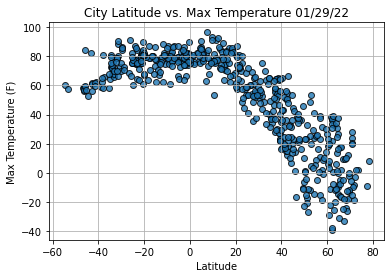

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

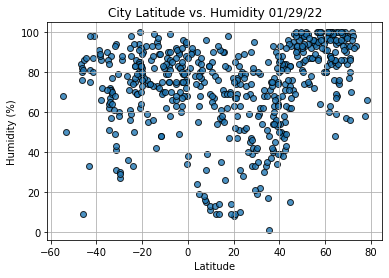

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

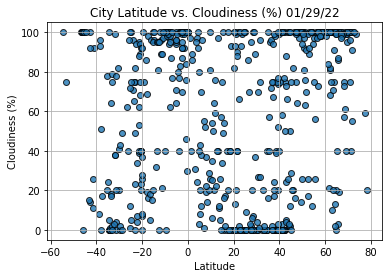

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

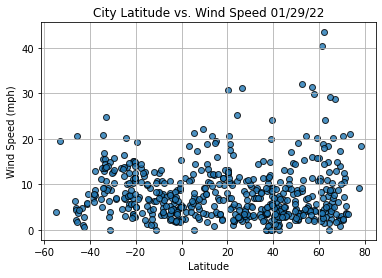

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                         Teya
Lat                       60.3778
Lng                       92.6267
Max Temp                     5.97
Humidity                       96
Cloudiness                    100
Wind Speed                   3.85
Country                        RU
Date          2022-01-29 17:06:29
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
541     True
542     True
543     True
544     True
545     True
Name: Lat, Length: 546, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,Tasiilaq,65.6145,-37.6368,17.76,75,86,6.24,GL,2022-01-29 17:02:15
12,Tiksi,71.6872,128.8694,-8.23,100,55,3.69,RU,2022-01-29 17:06:29
13,Teya,60.3778,92.6267,5.97,96,100,3.85,RU,2022-01-29 17:06:29
14,Inuvik,68.3499,-133.7218,-23.73,96,75,6.08,CA,2022-01-29 17:03:23
16,Sobolevo,54.4299,31.8996,24.01,87,100,6.87,RU,2022-01-29 17:06:30


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

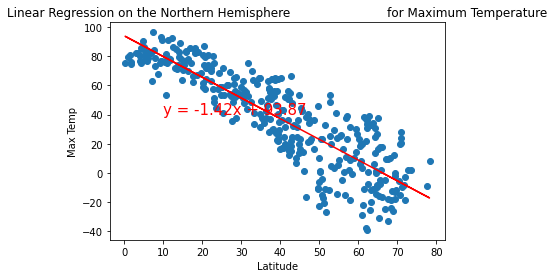

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

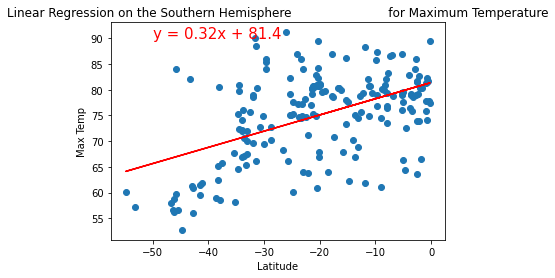

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

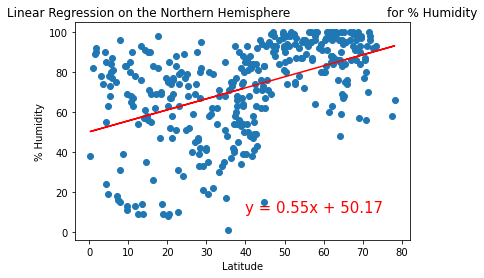

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

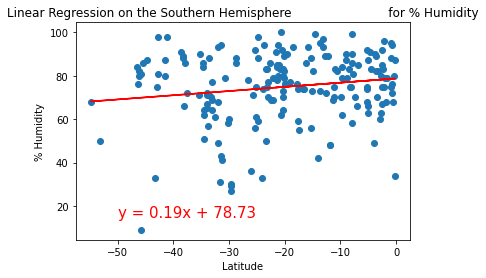

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

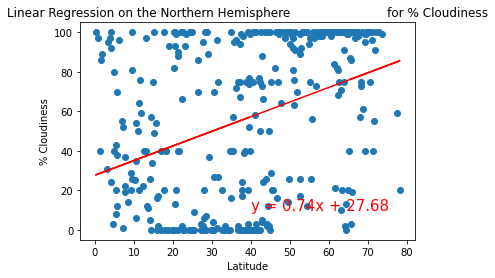

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

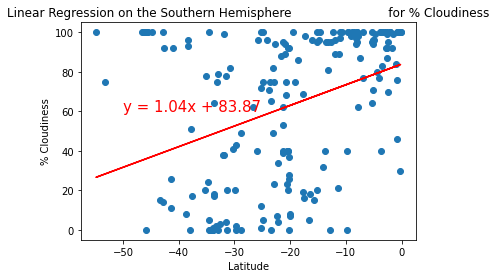

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

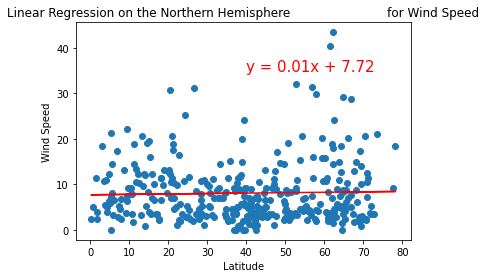

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

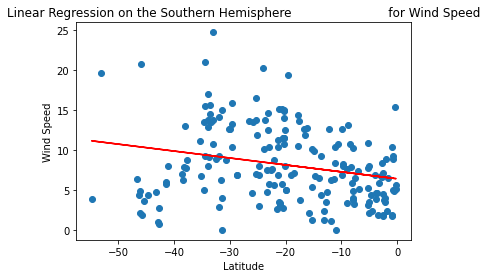

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))